In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Comment this if the data visualisations doesn't work on your side
%matplotlib inline

plt.style.use('bmh')

In [3]:
data = pd.read_excel("C:\\Users\saravanan\Documents\WorldBay\Query_All_Payments.xlsx")

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141063 entries, 0 to 141062
Data columns (total 14 columns):
Customer ID       141063 non-null int64
Payment Date      141063 non-null object
Customer Name     141063 non-null object
Phone             9088 non-null object
Mobile Phone      140266 non-null object
Email             140937 non-null object
Billing Street    140695 non-null object
Billing City      139666 non-null object
Branch            139755 non-null object
Unit              138765 non-null object
Basket            141042 non-null object
Channel           141063 non-null object
Amount Paid       141063 non-null float64
Sales Person      133394 non-null object
dtypes: float64(1), int64(1), object(12)
memory usage: 15.1+ MB


In [17]:
data.head()

,Customer ID,Payment Date,Customer Name,Phone,Mobile Phone,Email,Billing Street,Billing City,Branch,Unit,Basket,Channel,Amount Paid,Sales Person
0,143719000000000000,31/07/2022 00:00,Hammed Jimoh,NaN,8090815436,noreply@grocedy.com,60 Buari sreet,Mushin,Branch 4 - Mushin Centre,Unit 16 – Ladipo/Mushin/Ojuelegba/Lawanson/Idi...,Gold Basket,USSD,5000.0,Mrs Adeyemi
1,143719000000000000,31/07/2022 00:00,edegbe joy,NaN,8106802373,no-reply@grocedy.com,mofor,u,NaN,NaN,Bronze Basket,USSD,2000.0,NaN
2,143719000000000000,31/07/2022 00:00,innocent Amuh,NaN,8169583441,no-reply@grocedy.com,cms,marina,Branch 7 - Lagos Island Centre,Unit 34 – Obalende/Sura/Lagos Island/Agarawu/B...,Gold Basket,USSD,3000.0,NaN
3,143719000000000000,31/07/2022 00:00,WASIU kare kareem,NaN,8021661126,no-reply@grocedy.com,1 amu st,mushin,Branch 4 - Mushin Centre,Unit 16 – Ladipo/Mushin/Ojuelegba/Lawanson/Idi...,Silver Basket,USSD,2000.0,NaN
4,143719000000000000,31/07/2022 00:00,Aishat Jimoh,NaN,9066459093,no-reply@grocedy.com,2 amu st,Mushin,Branch 4 - Mushin Centre,Unit 16 – Ladipo/Mushin/Ojuelegba/Lawanson/Idi...,Bronze Basket,USSD,2000.0,NaN


#### Same Customer id is populated....need customer id information to join with other dataset and to identify pattern of each customer

In [19]:
data[['Customer ID']].nunique()

Customer ID    1
dtype: int64

In [38]:
data[['Customer Name']].nunique()

Customer Name    7885
dtype: int64

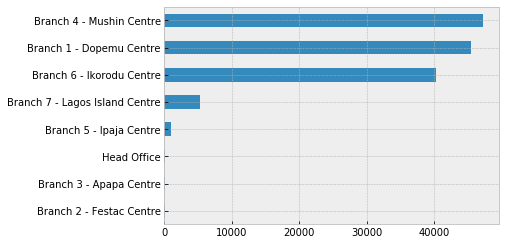

In [8]:
# t=data['Branch'].value_counts()
data.Branch.value_counts().sort_values().plot(kind = 'barh')

# Transactions with all products are available.
 1. Need to concentrate on the subscription baskets only?
 2. Need to do data cleaning as the basket names are not uniform

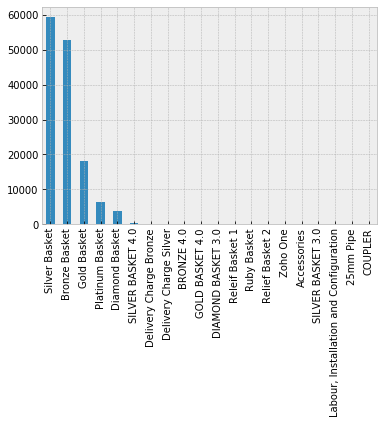

In [28]:
data.Basket.value_counts().sort_values(ascending=False).head(20).plot(kind = 'bar')

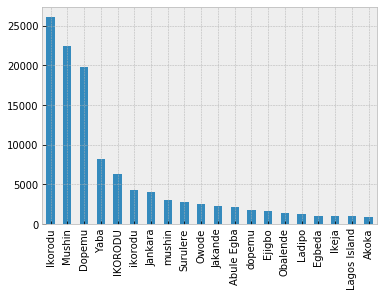

In [34]:
data['Billing City'].value_counts().sort_values(ascending=False).head(20).plot(kind = 'bar')

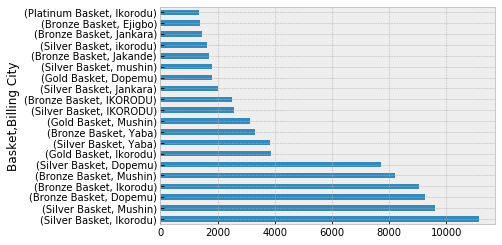

In [35]:
data.groupby(['Basket'])['Billing City'].value_counts().sort_values(ascending=False).head(20).plot(kind='barh')

In [35]:
data['Amount Paid'].describe()

count    1.410630e+05
mean     5.273210e+03
std      1.616936e+05
min      1.000000e+00
25%      5.000000e+02
50%      1.000000e+03
75%      1.000000e+03
max      2.532775e+07
Name: Amount Paid, dtype: float64

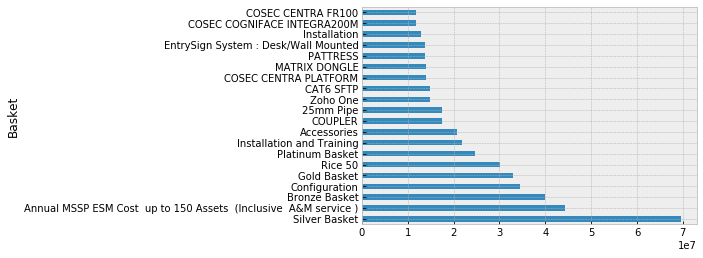

In [36]:
data.groupby(['Basket'])['Amount Paid'].sum().sort_values(ascending=False).head(20).plot(kind='barh')

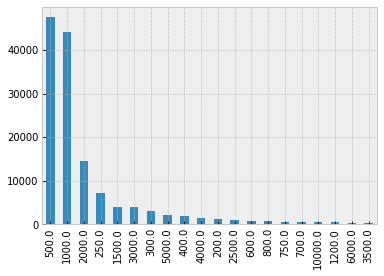

In [37]:
data['Amount Paid'].value_counts().sort_values(ascending=False).head(20).plot(kind = 'bar')

## Summary

1. Total unique customer - 7885 (based on name)
2. The average transaction amount is 500. 
3. Customers have transacted mostly in a range of 250 to 2000
4. The products bought are baskets (subscription) like silver,bronze etc
5. Top subscription is Silver basket
6. The products are billed to top cities like Ikorodu,mushin,dopemu,yaba

### To Do -- Data Cleaning and update the summary